In [150]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('dark_background')

In [162]:
nfhs = pd.read_excel("NFHS_5_Factsheets_Data-2.xls", sheet_name="India & States")
nfhs_total = nfhs[nfhs["Area"]=="Total"]
nfhs_urban = nfhs[nfhs["Area"]=="Urban"]
nfhs_rural = nfhs[nfhs["Area"]=="Rural"]

In [164]:
nfhs_total.to_excel("NFHS_5_Factsheets_Data-Total.xls", sheet_name="India & States", index=False)
nfhs_urban.to_excel("NFHS_5_Factsheets_Data-Urban.xls", sheet_name="India & States", index=False)
nfhs_rural.to_excel("NFHS_5_Factsheets_Data-Rural.xls", sheet_name="India & States", index=False)

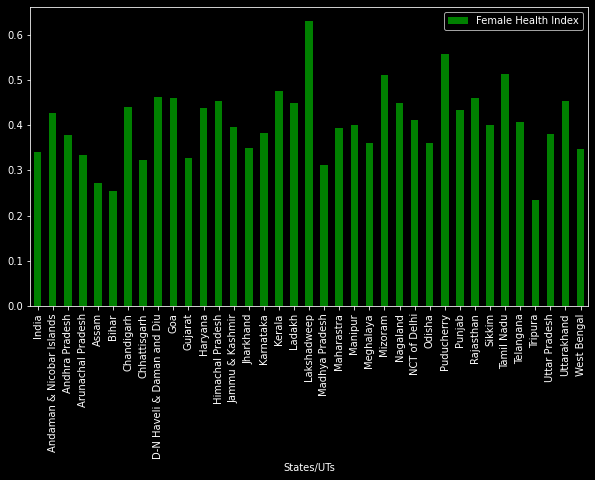

In [183]:
fhealth = pd.read_excel("FemaleHeath.xlsx",sheet_name="India & States")
fhealth = fhealth[fhealth["Area"]=="Total"]
tmp = fhealth[fhealth["life expectancy"].notna()]
avLE = tmp["life expectancy"].mean()
fhealth.loc[fhealth["life expectancy"].isna(),"life expectancy"] = avLE
fhealth["Young women age 18-29 years who experienced sexual violence by age 18 (%)"]
tmp = fhealth.loc[fhealth["Young women age 18-29 years who experienced sexual violence by age 18 (%)"]!="*","Young women age 18-29 years who experienced sexual violence by age 18 (%)"].mean()
fhealth.loc[fhealth["Young women age 18-29 years who experienced sexual violence by age 18 (%)"]=="*","Young women age 18-29 years who experienced sexual violence by age 18 (%)"] = tmp
#fhealth.iloc[:,2:] = fhealth.iloc[:,2:] / fhealth.iloc[:,2:].max()
def InverseFH(s):
    fhealth.loc[:,s] = 1/fhealth.loc[:,s]
InverseFH("Women (age 15-49 years) whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2)21 (%)")
InverseFH("Women (age 15-49 years) who are overweight or obese (BMI ≥25.0 kg/m2)21 (%)")
InverseFH("Women (age 15-49 years) who have high risk waist-to-hip ratio (≥0.85) (%)")
InverseFH("All women age 15-49 years who are anaemic22 (%)")
InverseFH("Women age 15 years and above wih high or very high (>140 mg/dl) Blood sugar level or taking medicine to control blood sugar level23 (%)")
InverseFH("Women age 15 years and above wih Elevated blood pressure (Systolic ≥140 mm of Hg and/or Diastolic ≥90 mm of Hg) or taking medicine to control blood pressure (%)")
InverseFH("Ever-married women age 18-49 years who have ever experienced spousal violence27 (%)")
fhealth.loc[fhealth["Young women age 18-29 years who experienced sexual violence by age 18 (%)"]==0,"Young women age 18-29 years who experienced sexual violence by age 18 (%)"]+=0.1
InverseFH("Young women age 18-29 years who experienced sexual violence by age 18 (%)")
InverseFH("Adolescent fertility rate for women age 15-19 years5")
fhealth.iloc[:,2:] = (fhealth.iloc[:,2:] - fhealth.iloc[:,2:].min())/(fhealth.iloc[:,2:].max() - fhealth.iloc[:,2:].min())
fhealth["Female Health Index"] = 0
#weights = [2,-3,-2,-1,-2,-1,-1,3,4,-2,-2,-0.1]
weights = [1,1,1,1,1,1,1,3,3,1.5,1.5,1]
#fhealth
Sumweights=0
for i in range(12):
    fhealth.iloc[:,14] += weights[i] * fhealth.iloc[:,i+2]
    Sumweights+=weights[i]
fhealth.iloc[:,14]/=Sumweights
final_fh = fhealth[["States/UTs","Female Health Index"]]
final_fh.plot.bar(x = "States/UTs",y = "Female Health Index",figsize=(10,5.5),color='green')


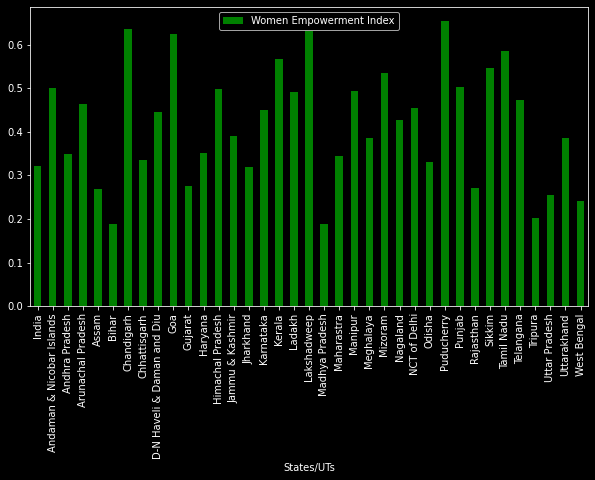

In [184]:
we = pd.read_excel("WomenEmpowerment.xls",sheet_name="India & States")
we = we[we["Area"]=="Total"]
we.loc[we["Ever-married women age 18-49 years who have experienced physical violence during any pregnancy (%)"]==0,"Ever-married women age 18-49 years who have experienced physical violence during any pregnancy (%)"]+=0.1
we.iloc[:,10:] = 1/we.iloc[:,10:]
we.iloc[:,2:] = (we.iloc[:,2:] - we.iloc[:,2:].min())/(we.iloc[:,2:].max() - we.iloc[:,2:].min())
we["Women Empowerment Index"] = 0
weights = [1,1,1,1,1,1,1,1,1,1]
Sumweights=0
for i in range(10):
    we.iloc[:,12] += weights[i] * we.iloc[:,i+2]
    Sumweights+= weights[i]
we.iloc[:,12]/=Sumweights
final_we = we[["States/UTs","Women Empowerment Index"]]
final_we.plot.bar(x = "States/UTs",y = "Women Empowerment Index",figsize = (10,5.5),color="green")


In [112]:
final_fh.to_excel("Female Health Index.xls",sheet_name = "India & States", index = False)

In [121]:
hcFac = pd.read_csv("HealthCare.csv")
hcFac = hcFac.fillna(0)
hcFac["total hospitals"] = 0
for i in range(2,6):
    hcFac.loc[:,"total hospitals"] += hcFac.iloc[:,i]
hcFac = hcFac[["State/UT","total hospitals"]]
hcFac.to_excel("TotalHealthCare.xls",sheet_name = "India & States",index = False)

In [142]:
health = pd.read_excel("Female Health Index.xls",sheet_name = "India & States")
health = health[["States/UTs","Female Health Index","Population living in households with an improved drinking-water source1 (%)","Population living in households that use an improved sanitation facility2 (%)","hospital(%)","Food Index"]]
health.loc[health["Food Index"]=='*',"Food Index"] = health.loc[health["Food Index"]!="*","Food Index"].mean()
health.iloc[:,2:] = (health.iloc[:,2:] - health.iloc[:,2:].min())/(health.iloc[:,2:].max() - health.iloc[:,2:].min())
Xdata = health.iloc[:,2:].values
Ydata = health.iloc[:,1:2].values
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()
reg1.fit(Xdata,Ydata)
reg1.coef_
#reg1.score(Xdata,Ydata)

array([[0.09984149, 0.06229062, 0.24115415, 0.08727431]])

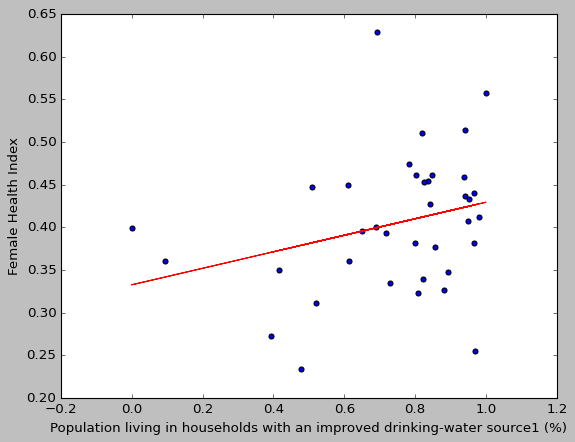

In [186]:
plt.style.use('classic')
health.plot.scatter(2,1)
xd = health.iloc[:,2:3].values
reg2 = LinearRegression()
reg2.fit(xd,Ydata)
cf = reg2.coef_
yd = reg2.intercept_ + cf[0][0] * xd
plt.plot(xd,yd,'r')
plt.show()


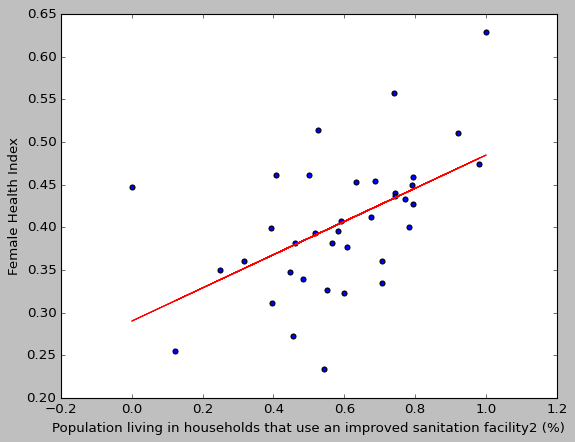

In [187]:
health.plot.scatter(3,1)
xd = health.iloc[:,3:4].values
reg2 = LinearRegression()
reg2.fit(xd,Ydata)
cf = reg2.coef_
yd = reg2.intercept_ + cf[0][0] * xd

plt.plot(xd,yd,'r')
plt.show()

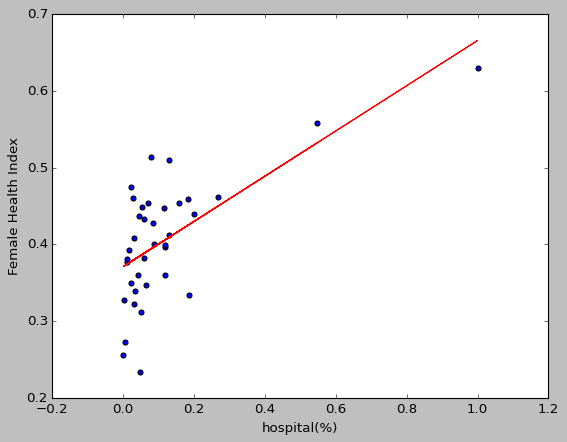

In [188]:
health.plot.scatter(4,1)
xd = health.iloc[:,4:5].values
reg2 = LinearRegression()
reg2.fit(xd,Ydata)
cf = reg2.coef_
yd = reg2.intercept_ + cf[0][0] * xd

plt.plot(xd,yd,'r')
plt.show()

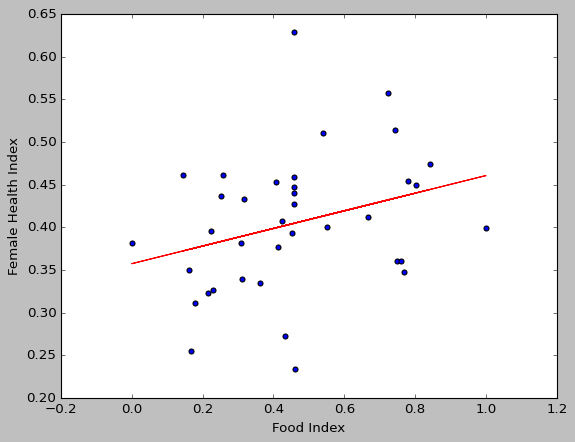

In [189]:
health.plot.scatter(5,1)
xd = health.iloc[:,5:6].values
reg2 = LinearRegression()
reg2.fit(xd,Ydata)
cf = reg2.coef_
yd = reg2.intercept_ + cf[0][0] * xd

plt.plot(xd,yd,'r')
plt.show()

In [175]:
scho10 = pd.read_excel("10yrsSchooling_DFG.xlsx",sheet_name = "Sheet1")
scho10 = scho10[scho10["Area"]=="Total"]
scho10.to_excel("BPBB.xls",sheet_name = "India & States",index=False)

In [181]:
ab = pd.read_csv("BPBB.csv")
ab["Total Funds"] = ab["Total Funds Released"]
ab.to_csv("BPBB.csv")

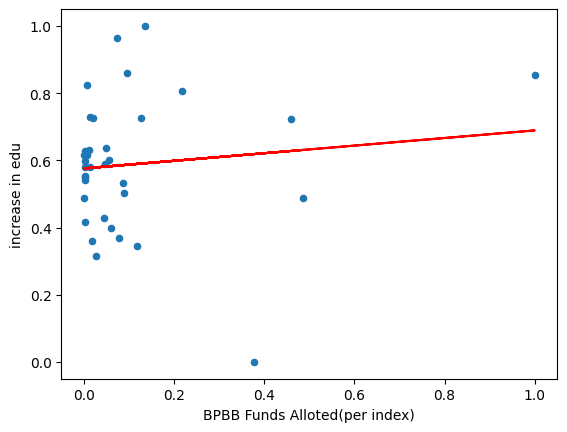

In [210]:
bpbb = pd.read_excel("BPBB.xls",sheet_name = "India & States")
bpbb = bpbb[["States/UTs","Area","Women (age 15-49)  with 10 or more years of schooling (%)-2015","Women (age 15-49)  with 10 or more years of schooling (%)-2020","BPBB Funds Alloted(per index)"]]
bpbb["increase in edu"] = bpbb["Women (age 15-49)  with 10 or more years of schooling (%)-2020"] - bpbb["Women (age 15-49)  with 10 or more years of schooling (%)-2015"]
bpbb.iloc[:,4:] = (bpbb.iloc[:,4:] - bpbb.iloc[:,4:].min())/(bpbb.iloc[:,4:].max() - bpbb.iloc[:,4:].min())
xd = bpbb.loc[:,["BPBB Funds Alloted(per index)"]].values
yd = bpbb.loc[:,["increase in edu"]]
reg2 = LinearRegression()
reg2.fit(xd,yd)
reg2.coef_
bpbb.plot.scatter("BPBB Funds Alloted(per index)","increase in edu")
yd = reg2.intercept_ + reg2.coef_ * xd
plt.plot(xd,yd,'r')
plt.show()